In [2]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import time 
import gmaps
from google import key

In [3]:
master_data = '../Data/clean/master_data.csv'

In [4]:
master_data_unis = pd.read_csv(master_data)

In [5]:
master_data_unis.head()



,Unnamed: 0,City,State,lat,long,Metro,County,2010-12,2011-12,2012-12,...,2016-12,2017-12,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019_Avg,State_abbrev
0,0,Round Rock,Texas,30.5252,-97.6660,Austin-Round Rock,Williamson County,NaN,794.5,805.0,...,884.0,991.0,1063.5,1042.5,1015.0,1000.0,1020.0,1050.0,1025.5,TX
1,1,Tampa,Florida,27.9701,-82.4797,Tampa-St. Petersburg-Clearwater,Hillsborough County,NaN,NaN,NaN,...,1220.0,1381.0,1476.5,1432.0,1440.0,1435.0,1480.0,1499.0,1457.2,FL
2,2,Scottsdale,Arizona,33.6843,-111.8611,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,NaN,NaN,...,1179.5,1268.0,1429.0,1418.5,1406.0,1365.0,1479.0,1450.0,1423.7,AZ
3,3,Oakland,California,37.7698,-122.2257,San Francisco-Oakland-Hayward,Alameda County,NaN,NaN,NaN,...,2000.0,2200.0,2997.5,2910.0,3050.0,3100.0,3055.0,3062.5,3035.5,CA
4,4,Albuquerque,New Mexico,35.1056,-106.6474,Albuquerque,Bernalillo County,NaN,NaN,625.0,...,646.0,675.0,764.0,772.5,765.0,769.0,775.0,775.0,771.3,NM


In [6]:
master_data_unis["Universities"] = " "

In [7]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [8]:
params = {"radius": 50000,
          "types": "school",
          "keyword":["univeristy", "college"],
          "key": key}

for index, row in master_data_unis.iterrows():
    lat = row["lat"]
    long = row["long"]
    params["location"] = f"{lat},{long}"
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    name_address = requests.get(base_url, params=params)
    name_address = name_address.json()
    try:
        master_data_unis.loc[index, "Universities"] = len(name_address["results"])
    except(KeyError, IndexError):
        master_data_unis.loc[index, "Universities"] = "none"
        
            

In [9]:
 print(json.dumps(name_address, indent=4, sort_keys=True))

{
    "html_attributions": [],
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 37.7908492,
                    "lng": -122.4454566
                },
                "viewport": {
                    "northeast": {
                        "lat": 37.79231892989272,
                        "lng": -122.4441318201073
                    },
                    "southwest": {
                        "lat": 37.78961927010727,
                        "lng": -122.4468314798927
                    }
                }
            },
            "icon": "https://maps.gstatic.com/mapfiles/place_api/icons/school-71.png",
            "id": "63b12fb6073c620f7803c7d8cfbaf15938962371",
            "name": "San Francisco University High School",
            "photos": [
                {
                    "height": 4160,
                    "html_attributions": [
                        "<a href=\"https://maps.google.com/maps/contrib/10389923

In [10]:
master_data_unis.head()

,Unnamed: 0,City,State,lat,long,Metro,County,2010-12,2011-12,2012-12,...,2017-12,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019_Avg,State_abbrev,Universities
0,0,Round Rock,Texas,30.5252,-97.6660,Austin-Round Rock,Williamson County,NaN,794.5,805.0,...,991.0,1063.5,1042.5,1015.0,1000.0,1020.0,1050.0,1025.5,TX,0
1,1,Tampa,Florida,27.9701,-82.4797,Tampa-St. Petersburg-Clearwater,Hillsborough County,NaN,NaN,NaN,...,1381.0,1476.5,1432.0,1440.0,1435.0,1480.0,1499.0,1457.2,FL,11
2,2,Scottsdale,Arizona,33.6843,-111.8611,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,NaN,NaN,...,1268.0,1429.0,1418.5,1406.0,1365.0,1479.0,1450.0,1423.7,AZ,7
3,3,Oakland,California,37.7698,-122.2257,San Francisco-Oakland-Hayward,Alameda County,NaN,NaN,NaN,...,2200.0,2997.5,2910.0,3050.0,3100.0,3055.0,3062.5,3035.5,CA,9
4,4,Albuquerque,New Mexico,35.1056,-106.6474,Albuquerque,Bernalillo County,NaN,NaN,625.0,...,675.0,764.0,772.5,765.0,769.0,775.0,775.0,771.3,NM,0


In [11]:
master_data_unis.describe()

,Unnamed: 0,lat,long,2010-12,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019_Avg,Universities
count,242.000000,242.000000,242.000000,11.000000,62.000000,77.000000,86.000000,106.000000,122.000000,158.000000,227.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,120.500000,36.518281,-99.346193,1360.181818,1015.870968,1107.363636,1129.168605,1156.556604,1226.565574,1182.825949,1221.008811,1273.068182,1272.700413,1278.576446,1289.053719,1299.373967,1304.830579,1288.907025,6.479339
std,70.003571,5.261703,17.508892,604.868468,487.165328,540.777563,533.301871,530.378640,526.980205,489.273366,508.062309,527.151687,523.672253,530.140065,532.858853,530.821574,534.784567,529.479964,5.093482
min,0.000000,21.324300,-157.847600,550.000000,397.000000,435.000000,435.000000,435.000000,459.000000,450.000000,445.000000,445.000000,462.500000,450.000000,495.000000,495.000000,495.000000,480.500000,0.000000
25%,60.250000,33.209025,-117.521450,866.250000,677.250000,690.000000,729.500000,753.750000,835.375000,821.250000,845.000000,880.000000,875.625000,880.750000,882.375000,900.500000,901.875000,895.750000,0.000000
50%,120.500000,36.149850,-96.864400,1394.500000,891.750000,900.000000,966.250000,1007.500000,1085.500000,1074.750000,1137.000000,1207.500000,1219.500000,1206.750000,1228.000000,1232.500000,1218.750000,1236.050000,7.000000
75%,180.750000,40.022600,-83.703375,1625.000000,1200.000000,1410.000000,1395.000000,1344.500000,1449.750000,1400.000000,1497.500000,1565.125000,1575.500000,1563.500000,1590.500000,1593.750000,1593.375000,1576.200000,10.000000
max,241.000000,61.174300,-71.020200,2450.000000,2467.500000,2800.000000,3047.000000,3418.000000,3400.000000,3100.000000,3300.500000,3425.000000,3495.000000,3500.000000,3500.000000,3525.000000,3600.000000,3524.000000,18.000000


In [12]:
master_data_unis.to_csv('../Data/clean/master_data_unis.csv', encoding ="utf-8", index=False)

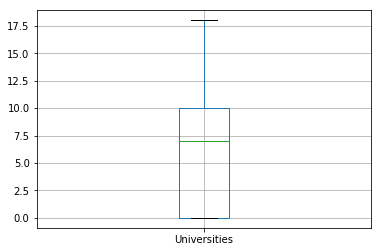

In [13]:
master_data_unis.boxplot("Universities")

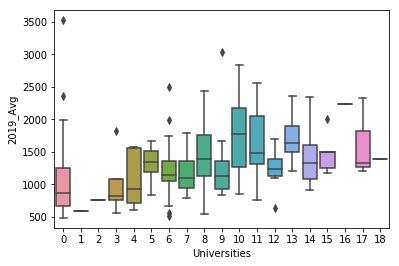

In [27]:
uni_rent_boxplot = sns.boxplot( x = "Universities", y = "2019_Avg", data = master_data_unis)

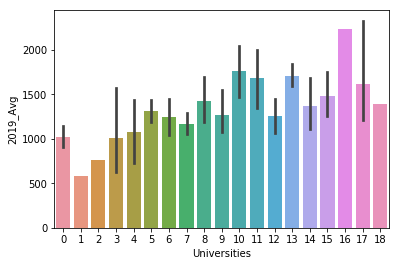

In [14]:
uni_rent_bar = sns.barplot(x="Universities", y ="2019_Avg", data = master_data_unis )

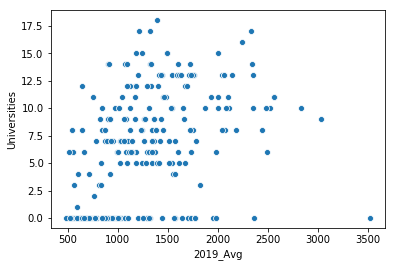

In [15]:
uni_rent_scatter = sns.scatterplot(x="2019_Avg", y ="Universities", data = master_data_unis )

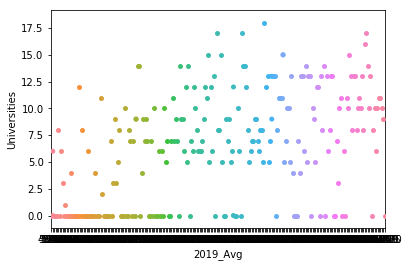

In [16]:
uni_rent_strip =  sns.stripplot(x = "2019_Avg", y = "Universities", data = master_data_unis )

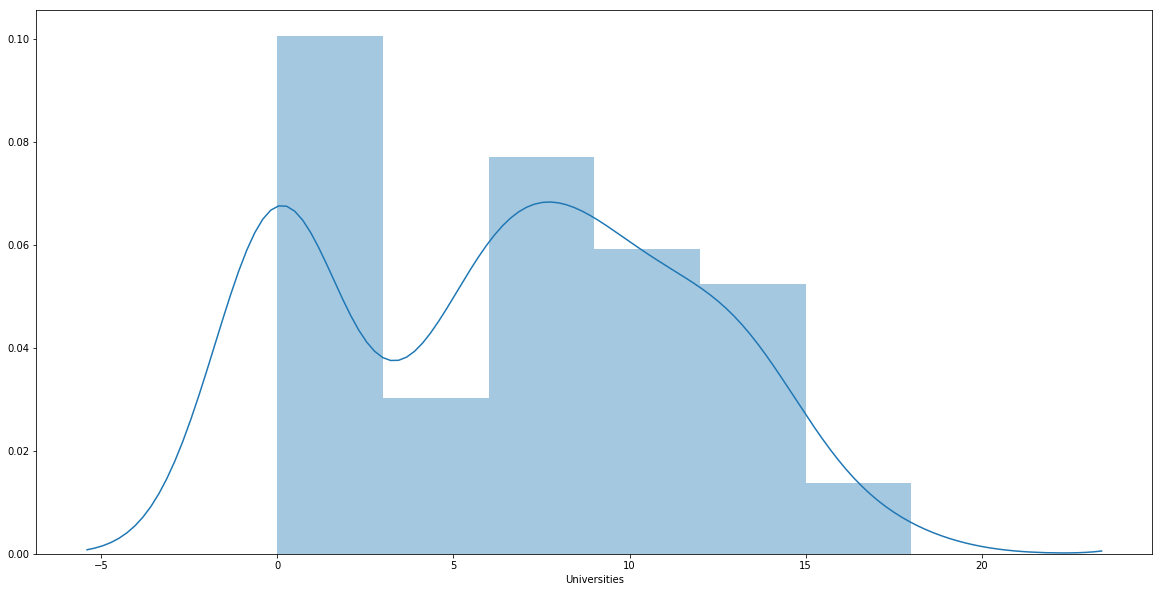

In [17]:
fig, (ax) = plt.subplots(ncols=1, sharey=False, figsize=(20,10))
sns.distplot(master_data_unis["Universities"])

In [18]:
#bimodal distribution 

In [19]:
unis_grouped = master_data_unis.groupby(["State", "City"])

In [20]:
unis_grouped["Universities"].value_counts()

State       City              Universities
Alabama     Birmingham        10              1
            Mobile            0               1
            Montgomery        0               1
            Tuscaloosa        0               1
Alaska      Anchorage         0               1
Arizona     Chandler          9               1
            Gilbert           7               1
            Glendale          9               1
            Mesa              7               1
            Peoria            8               1
            Phoenix           9               1
            Scottsdale        7               1
            Tempe             7               1
            Tucson            6               1
Arkansas    Little Rock       4               1
California  Anaheim           13              1
            Bakersfield       0               1
            Berkeley          6               1
            Burbank           0               1
            Carlsbad          10             

In [21]:
unis_grouped = pd.DataFrame(unis_grouped)

In [23]:
grouped_state = master_data_unis[["City","State", "Universities"]]

In [24]:
grouped_state = grouped_state.groupby(["State"]).count()

In [25]:
grouped_state

,City,Universities
State,,
Alabama,4,4
Alaska,1,1
Arizona,9,9
Arkansas,1,1
California,59,59
Colorado,11,11
Connecticut,5,5
District of Columbia,1,1
Florida,15,15
